<a href="https://colab.research.google.com/github/ianeckeli/Diretorio-Teste/blob/master/Teste_Data_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd 
import matplotlib.pyplot as plt
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:6 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 252 kB in 2s (139 kB/s)
Reading package lists... Done
Building dependency tree       
Reading s

In [79]:
nav = webdriver.Chrome('chromedriver',options=options)
strUrl = "https://www.bbc.com/portuguese/internacional-51718755"
nav.get(strUrl)
pagina = BeautifulSoup(nav.page_source, 'html.parser')
tabela = pagina.find('div' , attrs={'id': 'newsspec-26926' })

In [80]:
def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[1].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([td.get_text(strip=True) for td in tr.find_all(['th','td'])]) # data row
    return rows

In [81]:
list_table = tableDataText(tabela)

In [86]:
import pandas as pd
dftable = pd.DataFrame(list_table)
headers = dftable.iloc[0]
#dftable = dftable.rename(columns=dftable.iloc[0])
dftable  = pd.DataFrame(dftable.values[1:5], columns=headers)
dftable= dftable[dftable.columns[0:4]]
dftable

,,,Mortes,Mortalidade*,Total de casos
0,Estados Unidos,,181.327,"55,4",5.883.467
1,Brasil,,119.504,"57,1",3.804.803
2,México,,63.146,"50,0",585.738
3,Índia,,62.550,"4,6",3.463.972


In [88]:
lista = dftable.iloc[:, 0:3]
x = dftable.iloc[:,0]
y = dftable.iloc[:,2]
y

0    181.327
1    119.504
2     63.146
3     62.550
Name: Mortes, dtype: object

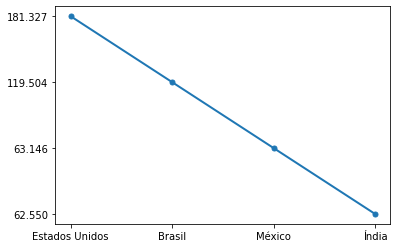

In [90]:
plt.plot(x,y, marker= 'o', linewidth = 2, markersize = 5,scalex= True)
plt.gca().invert_yaxis()
plt.show()